# model.ipynb
---
Look at `README.md` for more information.

IMPORTING THE NECESSARY MODULES
---

In [17]:
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

DEFINING INPUT FUNCTION
---

In [18]:
def get_input_fn(data_df, label_df, *, nr_epochs=20,
                 shuffle=True, batch_size=32):
    def input_fn():
        data = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle: data = data.shuffle(1000)
        data = data.batch(batch_size).repeat(nr_epochs)
        return data
    return input_fn

GETTING DATA
---

In [19]:
# https://xkcd.com/2582/

dftrain = pd.read_csv('./input_data.csv')
dfeval  = pd.read_csv('./test_data.csv')

# separate the training variables from the datasets
y_train = dftrain.pop('work')
y_eval  = dfeval.pop('work')

#print(dftrain.dtypes)
#print(dfeval.dtypes)


POPULATING FEATURE COLUMNS
---

In [20]:
CATEGORICAL_COLUMNS = ["day_of_week"]
NUMERIC_COLUMNS    = [
    "month",
    "day",
    "holiday"
]

feature_columns = list()

for feature_name in CATEGORICAL_COLUMNS:
    vocab = dftrain[feature_name].unique()
    feature_columns.append(
        tf.feature_column.categorical_column_with_vocabulary_list(
            feature_name, vocab))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(
        tf.feature_column.numeric_column(
            feature_name, dtype=tf.float32))

MODEL INITIALIZATION, TRAINING, AND EVALUATING
---

In [ ]:
train_input_fn = get_input_fn(dftrain, y_train, nr_epochs=1, shuffle=True)
eval_input_fn  = get_input_fn(dfeval, y_eval, nr_epochs=1, shuffle=False)

# using rudimentary linear regression model in tensorflow
model = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
)


loss_by_epoch     = []
accuracy_by_epoch = []
acceptable_loss   = 0.4

current_loss = 1.0

while current_loss > acceptable_loss:
    model.train(train_input_fn)
    result = model.evaluate(eval_input_fn)
    current_accuracy = result["accuracy"]
    current_loss     = result["loss"]
    accuracy_by_epoch.append(current_accuracy)
    loss_by_epoch.append(current_loss)


VISUALIZING DATA
---

### LOSS BY EPOCH

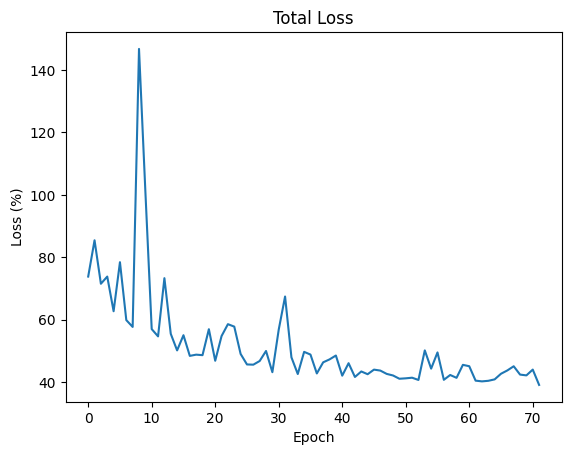

In [23]:
#print(loss_by_epoch)

import matplotlib.pyplot as plt

y = [i * 100 for i in loss_by_epoch]
x = range(0, len(loss_by_epoch))

plt.plot(x,y)
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (%)')
plt.savefig('./assets/asset3.png', bbox_inches='tight')
plt.show()

### ACCURACY BY EPOCH

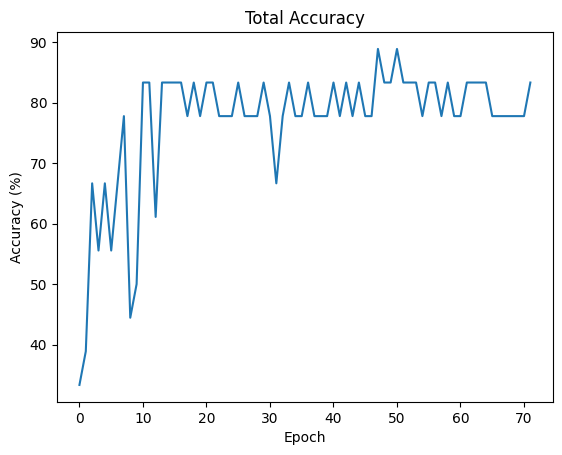

In [24]:
#print(accuracy_by_epoch)

import matplotlib.pyplot as plt

y = [i * 100 for i in accuracy_by_epoch]
x = range(0, len(accuracy_by_epoch))

plt.plot(x,y)
plt.title('Total Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()
